# Imports

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Analysis 01: Garden Path
## Evaluate whether model garden paths

    time python main.py --model_file 'grnn.model' --vocab_file 'grnn.vocab' \
    --data_dir './data/rrc/' --testfname 'rrc.txt' --test --words --nopp > rrc.output  
    
    time python main.py --model_file 'grnn.model' --vocab_file 'grnn.vocab' \
    --data_dir './data/rrc/' --testfname 'urc.txt' --test --words --nopp > urc.output  

## Read in Data

In [3]:
urc = pd.read_csv('urc.output', sep=' ')
urc['senttype'] = 'URC'
rrc = pd.read_csv('rrc.output', sep=' ')
rrc['senttype'] = 'RRC'

## Pull out critical region

In [4]:
urc = urc[urc['sentpos'].isin((9,10,11))]
urc['critpos'] = urc['sentpos'] - 9
rrc = rrc[rrc['sentpos'].isin((7,8,9))]
rrc['critpos'] = rrc['sentpos'] - 7
df = pd.concat((urc,rrc),axis=0)

## Plot garden path

/home/theodore/miniconda3/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


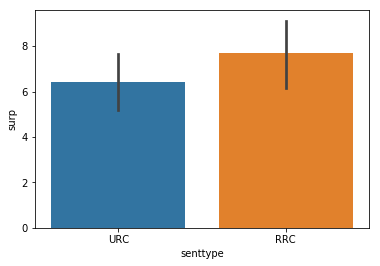

In [5]:
sns.barplot('senttype','surp',data=df)

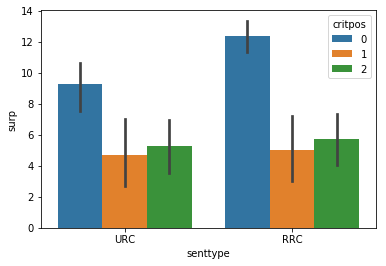

In [6]:
sns.barplot('senttype','surp',hue='critpos',data=df)

# Analysis 02: Minimal Pairs
## Evaluate whether model makes agreement errors

    time python main.py --model_file 'grnn.model' --vocab_file 'grnn.vocab' --data_dir './data/keys/' \
    --testfname 'keys-basic.txt' --test --words --nopp > keys.basic.output  
    
    time python main.py --model_file 'grnn.model' --vocab_file 'grnn.vocab' --data_dir './data/keys/' \
    --testfname 'keys-pprc.txt' --test --words --nopp > keys.pprc.output

In [23]:
keys = pd.read_csv('keys.basic.output', sep=' ')

In [24]:
keys

,word,sentid,sentpos,wlen,surp,entropy,entred
0,The,0,0,3,5.106277,5.545646,0.000000
1,key,0,1,3,9.467516,7.150015,0.000000
2,to,0,2,2,1.580543,5.429576,1.720439
3,the,0,3,3,0.867243,4.476835,0.952741
4,cabinets,0,4,8,14.355133,7.407035,0.000000
5,is,0,5,2,2.440182,3.668498,3.738537
6,The,1,0,3,5.106277,5.545646,0.000000
7,keys,1,1,4,11.710403,7.150015,0.000000
8,to,1,2,2,1.405390,3.440821,3.709193
9,the,1,3,3,0.586971,3.524778,0.000000


In [19]:
keys = keys[keys['sentpos'] == 5]
keys['cond'] = ['match','match','mismatch','mismatch']

In [20]:
keys

,word,sentid,sentpos,wlen,surp,entropy,entred,cond
5,is,0,5,2,2.440182,3.668498,3.738537,match
11,are,1,5,3,1.527412,4.178739,3.457888,match
17,are,2,5,3,3.888806,3.668498,3.738537,mismatch
23,is,3,5,2,5.355857,4.178739,3.457888,mismatch


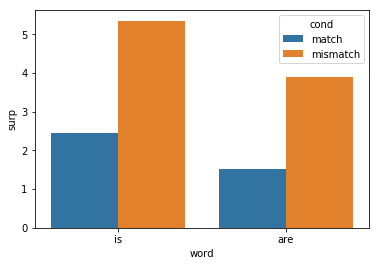

In [21]:
sns.barplot('word','surp',hue='cond',data=keys)

### Notice that the model is less surprised by plurals, similar to humans